In [1]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
matplotlib.rcParams['text.usetex'] = True
# import pandas as pd
import numpy as np
from scipy import signal
import os
plt.rcParams['axes.unicode_minus']=False

path = 'result/fig_1d'
if not os.path.exists(path):
    os.makedirs(path)

0


<ipython-input-2-2e518cbfe28f>:93: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


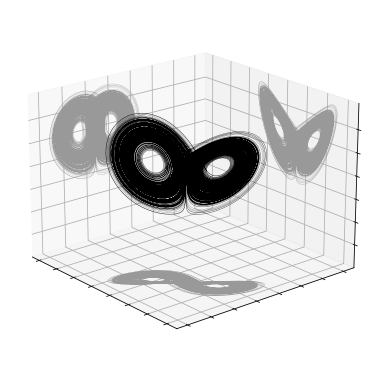

1


<ipython-input-2-2e518cbfe28f>:93: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


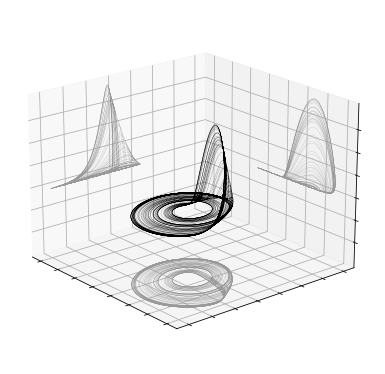

2


<ipython-input-2-2e518cbfe28f>:93: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


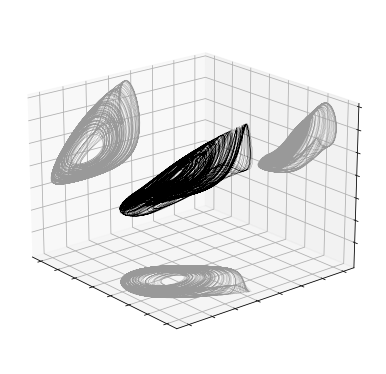

3


<ipython-input-2-2e518cbfe28f>:93: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


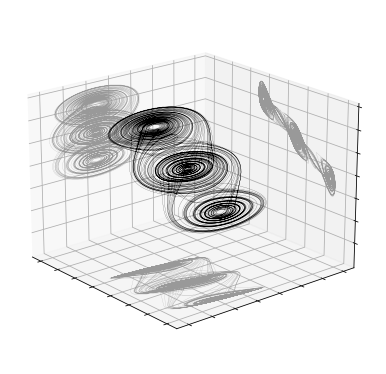

In [2]:
plt.close('all')
plt.ion()
names = [
    'lorenz',
    'rossler',
    'rabinovich_fabrikant',
    'chua'
]

def lighter(clr, f=1/3):
    """
    An implementation of Mathematica's Lighter[] 
    function for RGB colors
    clr : 3-tuple or list, an RGB color
    f : float, the fraction by which to brighten
    """
    gaps = [f*(1 - val) for val in clr]
    new_clr = [val + gap for gap, val in zip(gaps, clr)]
    return new_clr

def plot3dproj(x, y, z, *args, color=(0,0,0), shadow_dist=1.0, color_proj=None, 
    elev_azim=(39,-47), show_labels=True, **kwargs):
    """
    Create a three dimensional plot, with projections onto the 2D coordinate
    planes
    
    Parameters
    ----------
    x, y, z : 1D arrays of coordinates to plot
    *args : arguments passed to the matplotlib plt.plot functions
    - color : length-3 tuple
        The RGB color (with each element in [0,1]) to use for the
        three dimensional line plot
    - color_proj : length-3 tuple
        The RGB color (with each element in [0,1]) to use for the
        two dimensional projection plots. Defaults to a lighter version of the 
        plotting color
    - shadow_dist : float
        The relative distance of axes to their shadow. If a single value, 
        then the same distance is used for all three axies. If a triple, then 
        different values are used for all axes
    - elev_azim : length-2 tuple
        The starting values of elevation and azimuth when viewing the figure
    - show_labels : bool
        Whether to show numerical labels on the axes
    """

    if not color_proj:
        color_proj = lighter(color, .6)


    if np.isscalar(shadow_dist) == 1:
        sdist_x = shadow_dist
        sdist_y = shadow_dist
        sdist_z = shadow_dist
    else:
        sdist_x, sdist_y, sdist_z = shadow_dist

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection= '3d')
    
    ax.plot(x, z, *args, zdir='y', zs=sdist_y*np.max(y), color=color_proj, **kwargs)
    ax.plot(y, z, *args, zdir='x', zs=sdist_x*np.min(x), color=color_proj, **kwargs)
    ax.plot(x, y, *args, zdir='z', zs=sdist_z*np.min(z), color=color_proj, **kwargs)
    ax.plot(x, y, z, *args, color=color, **kwargs)

    ax.view_init(elev=elev_azim[0], azim=elev_azim[1])
#     ax.set_aspect('auto', adjustable='box') 
    
#     ratio = 1.0
#     xvals, yvals = ax.get_xlim(), ax.get_ylim()
#     xrange = xvals[1]-xvals[0]
#     yrange = yvals[1]-yvals[0]
#     ax.set_aspect(ratio*(xrange/yrange), adjustable='box')

    if not show_labels:
        ax.set_xticklabels([])                               
        ax.set_yticklabels([])                               
        ax.set_zticklabels([])

#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_zlabel('z')
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1)

    return ax


for i in range(len(names)): 
    print(i) 
    x = np.loadtxt('dataset/'+names[i]+'.txt', delimiter=',')[:50000]
    plot3dproj(x[:,0], x[:,1], x[:,2], shadow_dist=2.5, elev_azim=(20,-40), linewidth=.15, show_labels=False)
    plt.tight_layout()

    plt.savefig(path+'/{}_attractor.pdf'.format(names[i]), transparent=True)
    plt.show()

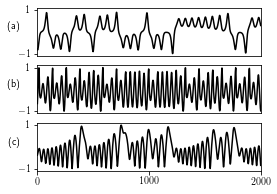

In [19]:

    
names = [
    'Lorenz',
    'Rossler',
    'Rabinovich Fabrikant',
#     'chua'
]
labels = [
    'Lorenz', 
    r'R\"{o}ssler', 
    'Rabinovich Fabrikant', 
    'Chua-like',
    '3 scroll',
    '4 scroll'
]
ylabels=['(a)','(b)','(c)']
plt.figure(figsize=(4,3))
for i in range(len(names)):
    plt.subplot(len(names),1,i+1)
    x = np.loadtxt('dataset/'+names[i]+'.csv', delimiter=',').T[0]
    plt.plot(x, 'k', markersize=2)
    peaks, _ = signal.find_peaks(x, distance=5)
    plt.xlim([0,2000])
    plt.ylabel(ylabels[i], rotation=0)
    plt.xticks([])
    plt.yticks([-1.0,1.0])
    if i == len(names)-1:
        plt.xticks([0,1000,2000])
#     plt.plot(peaks, x[peaks],'*',markersize=6)
# plt.savefig(path + '/peaks.pdf'.format(names[i]))

# i = 0
# x = np.loadtxt('dataset/'+names[i]+'.csv', delimiter=',').T[0]
# peaks, _ = signal.find_peaks(x, distance=5)
# plt.figure(figsize=(2.1,2))
# plt.plot(x[peaks][:-1], x[peaks][1:], '.k', markersize=1)
# plt.yticks([0,0.5,1])
# plt.tight_layout()
# plt.savefig(path + '/{}_ppp.pdf'.format(names[i]))

# i = 1
# x = np.loadtxt('dataset/'+names[i]+'.csv', delimiter=',').T[0]
# peaks, _ = signal.find_peaks(x, distance=5)
# plt.figure(figsize=(2.1,2))
# plt.plot(x[peaks][:-1], x[peaks][1:], '.k', markersize=1)
# plt.yticks([0.5,1])
# plt.tight_layout()
# plt.savefig(path + '/{}_ppp.pdf'.format(names[i]))

# i = 2
# x = np.loadtxt('dataset/'+names[i]+'.csv', delimiter=',').T[0]
# peaks, _ = signal.find_peaks(x, distance=5)
# plt.figure(figsize=(2.1,2))
# plt.plot(x[peaks][:-1], x[peaks][1:], '.k', markersize=1)
# plt.yticks([0,0.5,1])
# plt.xticks([0,0.5,1])
# plt.tight_layout()
# plt.savefig(path + '/{}_ppp.pdf'.format(names[i]))

In [20]:
path = 'result/esn_attn_standalone'
for system_name in [
    'lorentz',
#     'rabinovich_fabrikant', 
#     'lorentz', 
#     'chua'
]:
    df1 = pd.read_csv(path+'/'+system_name+'_esn_multistep.txt', header=None)
#     df2 = pd.read_csv(path+'/'+system_name+'_esn_attn_multistep.txt', header=None)
    df3 = pd.read_csv(path+'/'+system_name+'_esn_attn_svd_multistep.txt', header=None)

    plt.figure(figsize=(5,5))
    yerr1 = np.array([list(df1.quantile(0.05)), list(df1.quantile(0.95))]).reshape((1,2,100))
    df1.median().plot( yerr=yerr1, alpha=0.8, label='ESN')
#     yerr2 = np.array([list(df2.quantile(0.25)), list(df2.quantile(0.75))]).reshape((1,2,10))
#     df2.median().plot( yerr=yerr2, alpha=0.8, label='ESN-ATTN')
    yerr3 = np.array([list(df3.quantile(0.05)), list(df3.quantile(0.95))]).reshape((1,2,100))
    df3.median().plot(yerr=yerr3, alpha=0.5, label='ESN-SVD-ATTN')
    plt.xticks([i for i in range(10)], [i for i in range(1,11)])
    plt.xlim([-0.5,99.5])
    plt.yscale('log') 
    plt.legend(loc='upper left')

NameError: name 'pd' is not defined

In [ ]:


    
names = [
    'Lorenz',
    'Rossler',
    'Rabinovich Fabrikant',
#     'chua'
]
labels = [
    'Lorenz', 
    r'R\"{o}ssler', 
    'Rabinovich Fabrikant', 
    'Chua-like',
    '3 scroll',
    '4 scroll'
]
ylabels=['x','y','z']
plt.figure(figsize=(4,3))
for i in range(len(names)):
    plt.subplot(len(names),1,i+1)
    x = np.loadtxt('dataset/'+names[i]+'.csv', delimiter=',').T[0]
    plt.plot(x, 'k', markersize=2)
    peaks, _ = signal.find_peaks(x, distance=5)
    plt.xlim([0,2000])
    plt.ylabel(ylabels[i], rotation=0)
    plt.xticks([])
    plt.yticks([-1.0,1.0])
    if i == len(names)-1:
        plt.xticks([0,1000,2000])
#     plt.plot(peaks, x[peaks],'*',markersize=6)
# plt.savefig(path + '/peaks.pdf'.format(names[i]))

# i = 0
# x = np.loadtxt('dataset/'+names[i]+'.csv', delimiter=',').T[0]
# peaks, _ = signal.find_peaks(x, distance=5)
# plt.figure(figsize=(2.1,2))
# plt.plot(x[peaks][:-1], x[peaks][1:], '.k', markersize=1)
# plt.yticks([0,0.5,1])
# plt.tight_layout()
# plt.savefig(path + '/{}_ppp.pdf'.format(names[i]))

# i = 1
# x = np.loadtxt('dataset/'+names[i]+'.csv', delimiter=',').T[0]
# peaks, _ = signal.find_peaks(x, distance=5)
# plt.figure(figsize=(2.1,2))
# plt.plot(x[peaks][:-1], x[peaks][1:], '.k', markersize=1)
# plt.yticks([0.5,1])
# plt.tight_layout()
# plt.savefig(path + '/{}_ppp.pdf'.format(names[i]))

# i = 2
# x = np.loadtxt('dataset/'+names[i]+'.csv', delimiter=',').T[0]
# peaks, _ = signal.find_peaks(x, distance=5)
# plt.figure(figsize=(2.1,2))
# plt.plot(x[peaks][:-1], x[peaks][1:], '.k', markersize=1)
# plt.yticks([0,0.5,1])
# plt.xticks([0,0.5,1])
# plt.tight_layout()
# plt.savefig(path + '/{}_ppp.pdf'.format(names[i]))